# Granite Vision

**Granite Vision** is a vision-language model built on IBM's state-of-the-art 2 billion-parameter Granite language model. It is designed for visual document understanding, enabling automated content extraction from tables, charts, infographics, plots, diagrams, and more. The model is compact and efficient, making it suitable for everyday enterprise use cases.

See [IBM Granite 3.2: Reasoning, vision, forecasting and more](https://www.ibm.com/new/announcements/ibm-granite-3-2-open-source-reasoning-and-vision)

In [1]:
import torch

device = ""
if torch.cuda.is_available():
    device = "cuda" 
    use_fast = True
elif torch.cuda.is_available():
    device = "xpu"
    use_fast = True
else:
    device ="cpu"
    use_fast = False

print("device="+ device)

device=cpu


Using [ibm-granite/granite-vision-3.2-2b](https://huggingface.co/ibm-granite/granite-vision-3.2-2b) from Hugging Face

In [2]:
from transformers import AutoProcessor, AutoModelForVision2Seq
from huggingface_hub import hf_hub_download

model_path = "ibm-granite/granite-vision-3.2-2b"
# ibm-granite/granite-vision-3.2-2b
processor = AutoProcessor.from_pretrained(model_path, use_fast=True)
model = AutoModelForVision2Seq.from_pretrained(model_path).to(device)

# prepare image and text prompt, using the appropriate prompt template

img_path = hf_hub_download(repo_id=model_path, filename='example.png')

conversation = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": img_path},
            {"type": "text", "text": "What is the highest scoring model on ChartQA and what is its score?"},
        ],
    },
]
inputs = processor.apply_chat_template(
    conversation,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(device)


# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=2000)
print(processor.decode(output[0], skip_special_tokens=True))


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

<|system|>
A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.
<|user|>

What is the highest scoring model on ChartQA and what is its score?
<|assistant|>
The highest scoring model on ChartQA is Granite Vision with a score of 0.87.


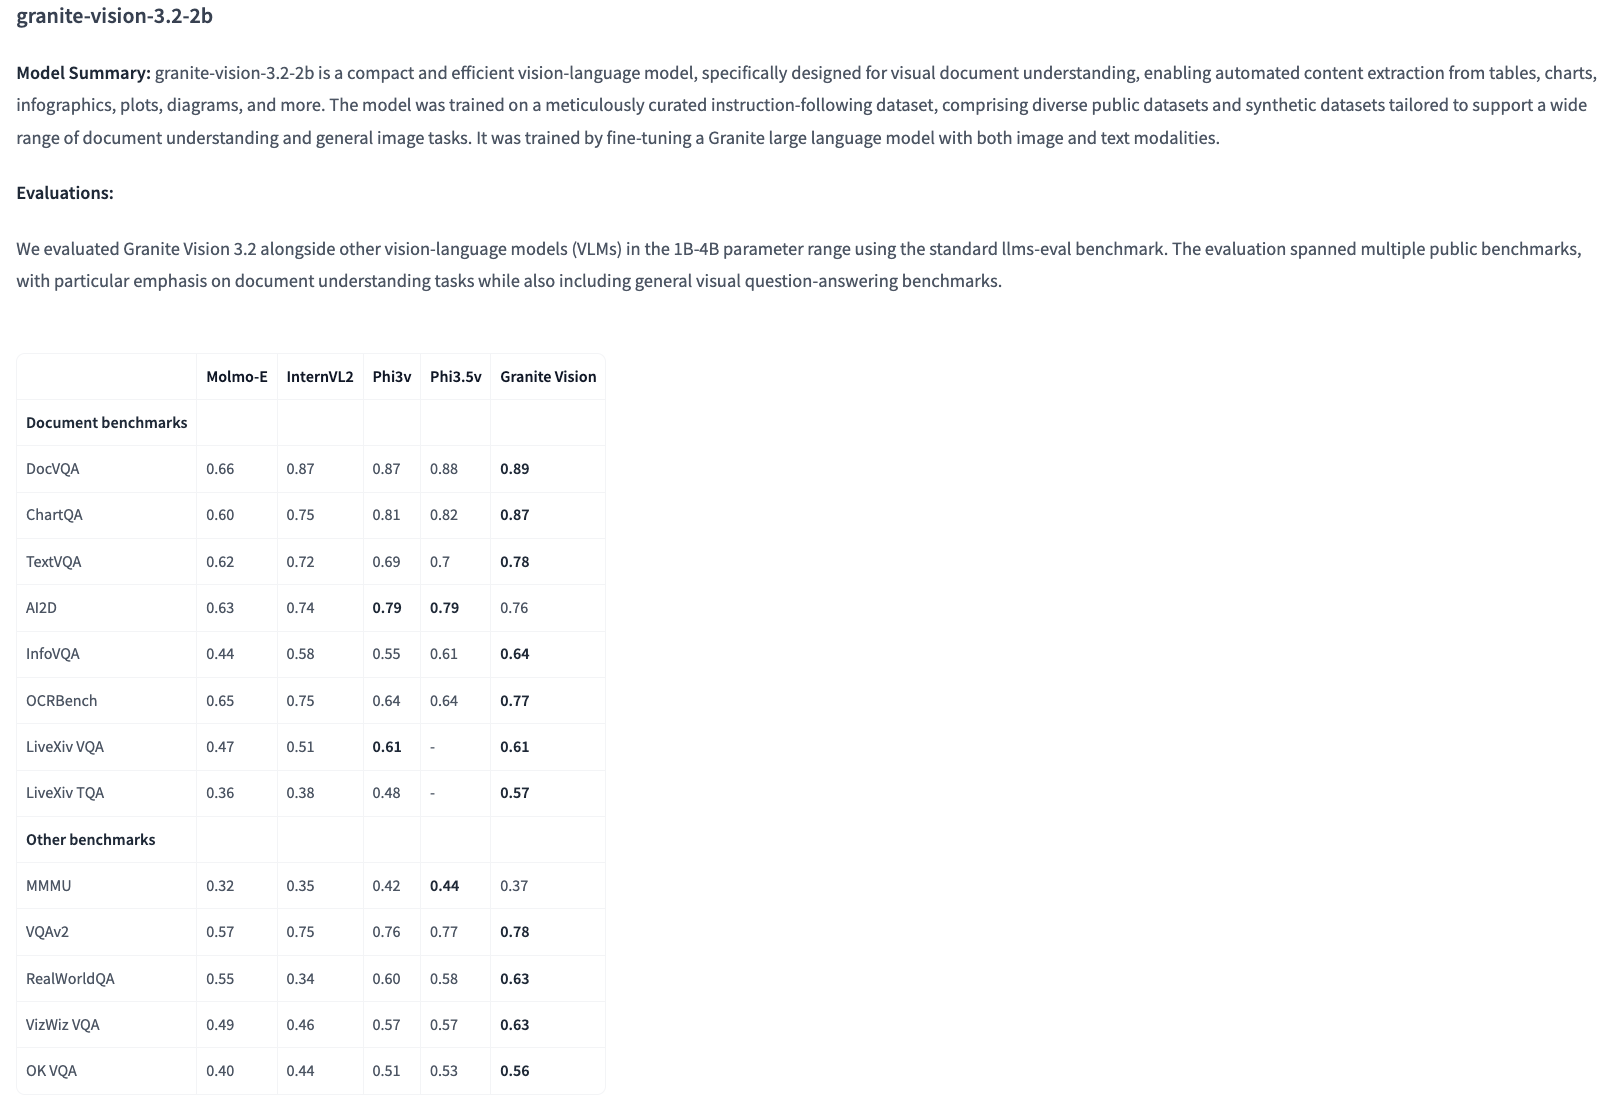

In [3]:
from IPython.display import Image, display

# Displaying an image from a file
display(Image(filename=img_path))

In [5]:
conversation = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": img_path},
            {"type": "text", "text": 
             """Provide the **Document benchmarks** presented in the image as JSON. \
             Response with valid JSON only. Do not include any explanation or extra text.
             If you can, include DocVQA, ChartQA, TextVQA, AI2D, InfoVQA, OCRBench, LiveXiv VQA, and LivXiv TQA.
             Output using the following JSON format:
                [
                  {
                    "Document benchmark": "DocVQA",
                    "Molmo-E": 0.66,
                    "InternVL2": 0.87,
                    "Phi3v": 0.88,
                    "Granite Vision": 0.89
                  }
                ]
            """
            },
        ],
    },
]
inputs = processor.apply_chat_template(
    conversation,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(device)


# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(output[0], skip_special_tokens=True))

<|system|>
A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.
<|user|>

Provide the **Document benchmarks** presented in the image as JSON.              Response with valid JSON only. Do not include any explanation or extra text.
             If you can, include DocVQA, ChartQA, TextVQA, AI2D, InfoVQA, OCRBench, LiveXiv VQA, and LivXiv TQA.
             Output using the following JSON format:
                [
                  {
                    "Document benchmark": "DocVQA",
                    "Molmo-E": 0.66,
                    "InternVL2": 0.87,
                    "Phi3v": 0.88,
                    "Granite Vision": 0.89
                  }
                ]
            
<|assistant|>
[
                  {
                    "Document benchmark": "DocVQA",
                    "Molmo-E": 0.66,
                    "InternVL2": 0.87,
                    "Phi3v": 0.88,
      